# Zillow Housing Data


# Questions 
## 1. Which state/city was the hardest hit by the housing crash at 2008
### a) State 
### b) City 
## 2. Which state/city recovered the best from the housing crash
### a) What are the recovery of rent in relative to price Pre/After 2008 crash
### b) Which housing type recovered the best
## 3. What kind of houses are most resilient against economic downturn 
### (I am assuming that it will be single family house due to lack of family obligation. Hence they can cut down on their other cost. In addition, since their salaries are lower, they are probably less likely to be fired compared to a higher exec with high salary)
## 4. Correlation between rental price and sales price. Does increase of rental entice investors to buy?

## Importing Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading files

In [4]:
df_city = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/City_time_series.csv")
df_state = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/State_time_series.csv")
df_metro = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/Metro_time_series.csv")

list(df_state.columns.values)

['Date',
 'RegionName',
 'DaysOnZillow_AllHomes',
 'HomesSoldAsForeclosuresRatio_AllHomes',
 'InventorySeasonallyAdjusted_AllHomes',
 'InventoryRaw_AllHomes',
 'MedianListingPricePerSqft_1Bedroom',
 'MedianListingPricePerSqft_2Bedroom',
 'MedianListingPricePerSqft_3Bedroom',
 'MedianListingPricePerSqft_4Bedroom',
 'MedianListingPricePerSqft_5BedroomOrMore',
 'MedianListingPricePerSqft_AllHomes',
 'MedianListingPricePerSqft_CondoCoop',
 'MedianListingPricePerSqft_DuplexTriplex',
 'MedianListingPricePerSqft_SingleFamilyResidence',
 'MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence',
 'MedianPctOfPriceReduction_AllHomes',
 'MedianPctOfPriceReduction_CondoCoop',
 'MedianPctOfPriceReduction_SingleFamilyResidence',
 'MedianPriceCutDolla

# Sorting Year in date

In [5]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['Year'] = df_city['Date'].apply(lambda x: x.year)
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_state['Year'] = df_state['Date'].apply(lambda x: x.year)


# Get correlations between columns. Between Listing price of different housing type in order to reduce columns

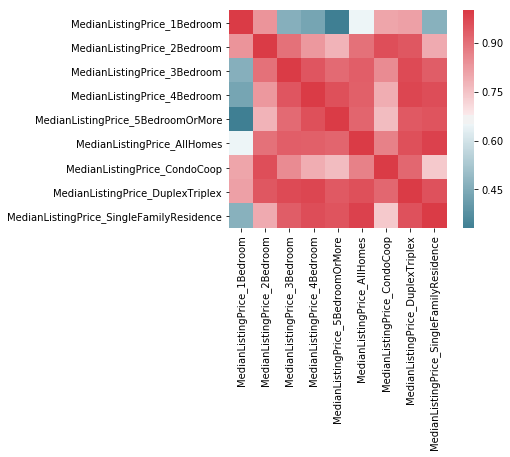

In [6]:

df_city1 = df_city[['MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence',]]

corr = df_city1.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


### Categories that are highly correlated from the above heat map:
### DuplexTriplex & 4 Bedroom
### SingleFamily & All homes
### CondoCoop with 2 Bedroom
### Will remove DuplexTriplex, CondoCoop, and All homes from future analysis due to the high correlations
### Interestingly 1 Bedroom and SingleFamily actually has negative correlations

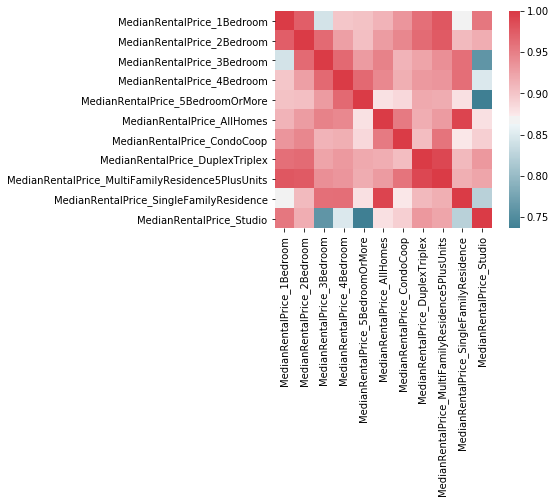

In [7]:

df_city2 = df_city[[ 
 'MedianRentalPrice_1Bedroom',
 'MedianRentalPrice_2Bedroom',
 'MedianRentalPrice_3Bedroom',
 'MedianRentalPrice_4Bedroom',
 'MedianRentalPrice_5BedroomOrMore',
 'MedianRentalPrice_AllHomes',
 'MedianRentalPrice_CondoCoop',
 'MedianRentalPrice_DuplexTriplex',
 'MedianRentalPrice_MultiFamilyResidence5PlusUnits',
 'MedianRentalPrice_SingleFamilyResidence',
 'MedianRentalPrice_Studio']]

corr1 = df_city2.corr()
#print(corr1)
sns.heatmap(corr1,mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


### Only category with the highest correlation is AllHomes and SingleFamilyResidence.
### AllHomes will be removed in future analysis

# 1. Which state/city was the hardest hit by the housing crash at 2008
## a) State
## b) City

# Exploring median listing price for state and city

# Top 20 Turnover state after 2008

Text(0.5,1,'Top 10 turnover rate by state')

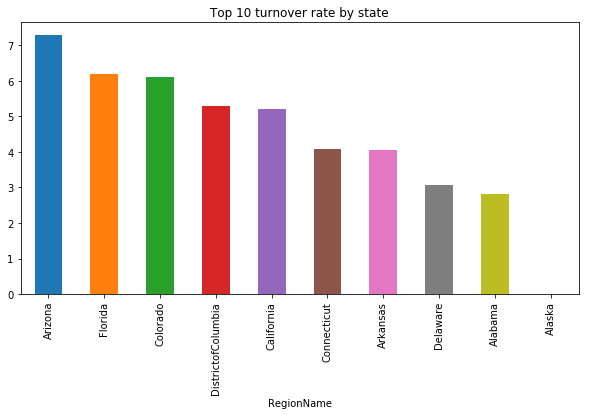

In [8]:
df_state_year = df_state[df_state['Year']>2007]
df_state_year1 = df_state[df_state['Year']<2016]
df_state_year.groupby(df_state_year['RegionName'])['Turnover_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('Top 10 turnover rate by state')
#confirm using ZHIV median price split by state. 

# To confirm the above states, we'll look at ZHVI for all homes at 2008

In [9]:
#confirm using ZHIV median price split by state. 
#df_state_year1.groupby(df_state_year1['Year'])['ZHVI_AllHomes'].mean()
#df_state_year1.groupby(df_state_year['RegionName']).mean() #between 2007 - 2016
#plt.title('Top 10 ZHVI by state')
new = df_state[['RegionName','Year','PctOfHomesDecreasingInValues_AllHomes']]
grouped = new.groupby('PctOfHomesDecreasingInValues_AllHomes')

# Creating Dataframe with top 10 states

In [10]:
#create a list with all the state name
#push each string into a dict.
#list = ['Ariz']

# list_states = ['Arizona','california','new york']

# df_state={}

# for each in list_states:
#   df_state[each] = df_state[df_state['RegionName'].str.contains(each)]

list_states = ['Arizona','Florida','Colorado','DistrictofColumbia','California','Connecticut','Arkansas','Delaware','Alabama']


df_state_az = df_state[df_state['RegionName'].str.contains('Arizona')]
df_state_fl = df_state[df_state['RegionName'].str.contains('Florida')]
df_state_co = df_state[df_state['RegionName'].str.contains('Colorado')]
df_state_dc = df_state[df_state['RegionName'].str.contains('DistrictofColumbia')]
df_state_ca = df_state[df_state['RegionName'].str.contains('California')]
df_state_ct = df_state[df_state['RegionName'].str.contains('Connecticut')]
df_state_ar = df_state[df_state['RegionName'].str.contains('Arkansas')]
df_state_de = df_state[df_state['RegionName'].str.contains('Delaware')]
df_state_al = df_state[df_state['RegionName'].str.contains('Alabama')]
frames = [df_state_az ,df_state_fl , df_state_co , df_state_dc , df_state_ca , df_state_ct , df_state_ar , df_state_de, df_state_al]
df_state_top10 = pd.concat(frames)


# Which of the top 10 states recovered the most

Text(0.5,1,'State with the highest recovery')

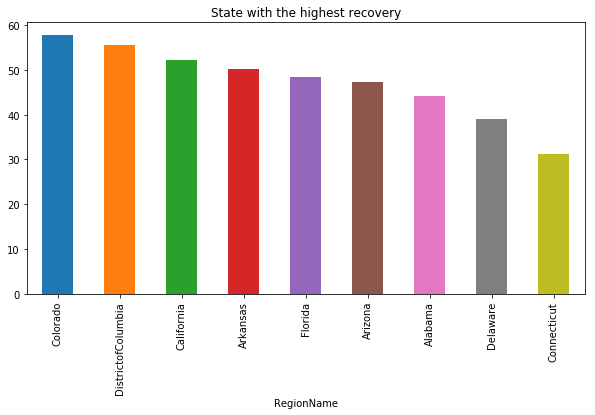

In [11]:
df_state_top10year = df_state_top10[df_state_top10['Year']>2007]
df_state_top10year.groupby(df_state_top10year['RegionName'])['PctOfHomesIncreasingInValues_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('State with the highest recovery')

# Compare state to state by year over year growth. 

# Top 20 turnover cities after 2008

Text(0.5,1,'Top 20 turnover rate by cities')

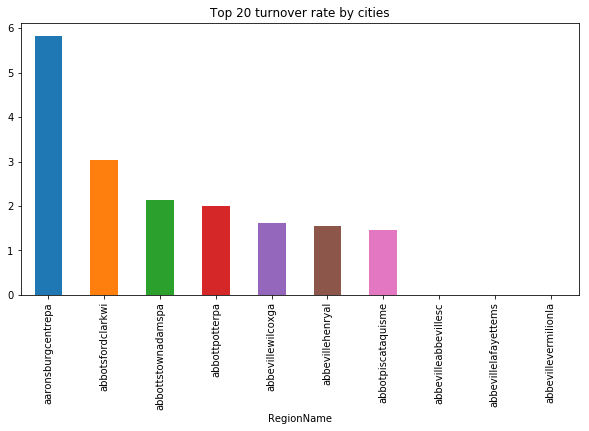

In [12]:
df_city_year = df_city[df_city['Year']>2007]
df_city_year.groupby(df_city_year['RegionName'])['Turnover_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('Top 20 turnover rate by cities')
#ZHVI

## Interestingly the city with the highest turnover ratio is Aaronsburg, PA. Let us look into overall housing in that city as well. 

## Exploring foreclousre rate in Arizona over the years

Text(0,0.5,'Percentage')

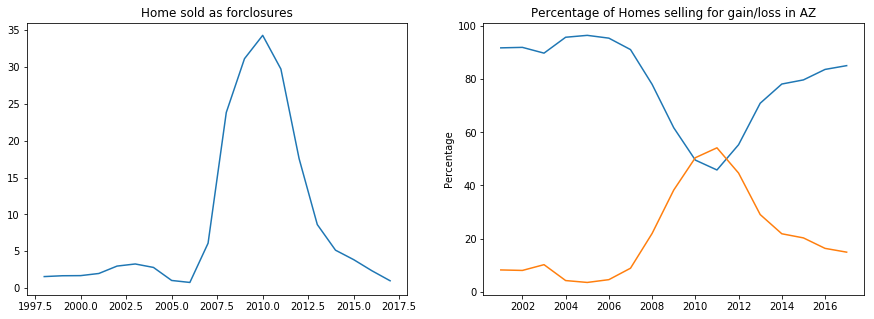

In [13]:
df_state_az = df_state[df_state['RegionName'].str.contains('Arizona')]
#df_state_az

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df_state_az.groupby(df_state_az['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
plt.title('Home sold as forclosures')

plt.subplot(1,2,2)
plt.plot(df_state_az.groupby(df_state_az['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
plt.title('Percentage of Homes selling for gain/loss in AZ')
plt.ylabel('Percentage')

#NEED TO ADD LEGEND

# The percentage of houses selling for loss in AZ has decreased, however, it has not return to pre 2008 level. On the flip side, percentage of home selling for gains has not return back to pre 2008 as well. Let us further analyze recovery of AZ's housing market compared to other states. 

# Let's further breakdown into AZ housing market.
## Let's get forclosure rate city by city

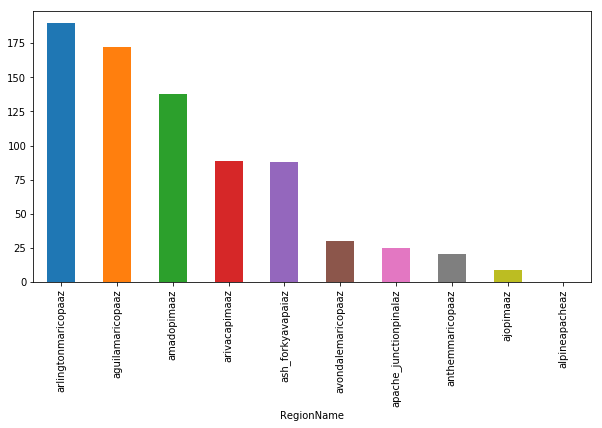

In [14]:
df_city_az = df_city[df_city['RegionName'].str.endswith('az')]
df_city_az_year = df_city_az[df_city_az['Year']>2007]
df_city_az.groupby(df_city_az_year['RegionName'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
# plt.title('Top 10 Home sold as foreclosures ratios')

# 2. Which state/city recovered the best from the crash

Text(0.5,1,'State with the highest recovery')

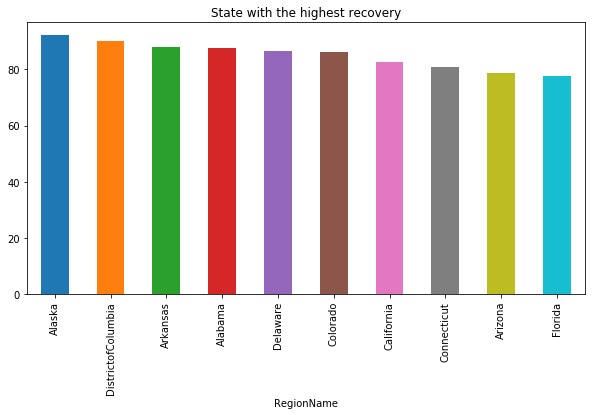

In [15]:
df_state.groupby(df_state['RegionName'])['PctOfHomesSellingForGain_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('State with the highest recovery')

# The above shows the highest increase in value since 1987. Since it has increased by so much, maybe it will not be wise to invest in these states if you are looking for property value gain.

Text(0.5,1,'State with the highest recovery')

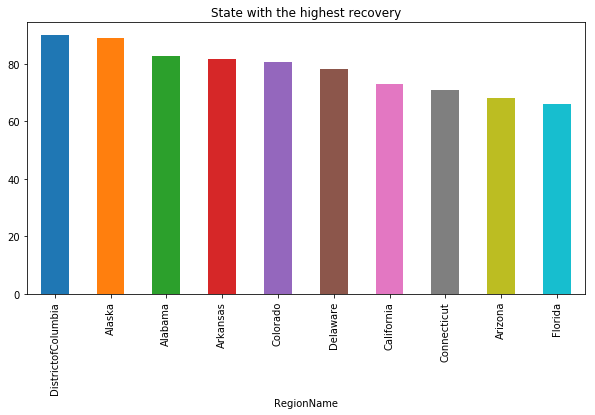

In [16]:
df_state_year = df_state[df_state['Year']>2007]
df_state_year.groupby(df_state_year['RegionName'])['PctOfHomesSellingForGain_AllHomes'].mean().head(10).sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('State with the highest recovery')

# The graph above shows the recovery since 2008. The hardest hit state by the 2008 is Arizona, and it only ranked #9 on the list. Does it mean that it still has room for value growth?